Case 0 - Manhattan distance
Path length: 25
Cost: 24
Optimal cost: 24
Is optimal? Yes


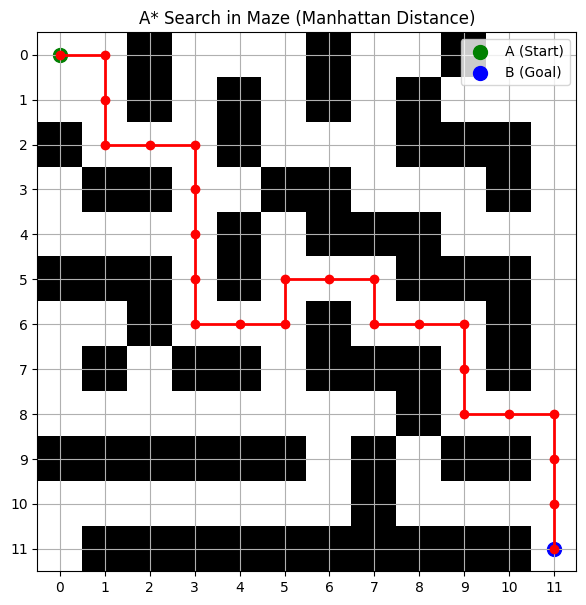

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]

Case 1 - Manhattan distance * 1.5
Path length: 25
Cost: 24
Optimal cost: 24
Is optimal? Yes


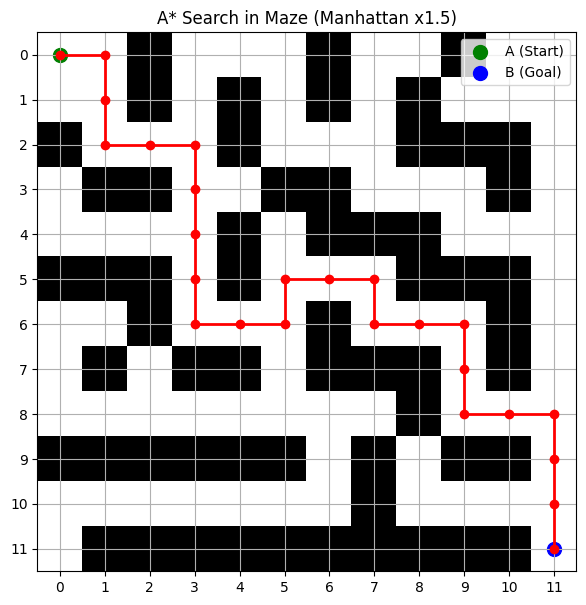

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]

Case 2 - Inconsistent heuristic
Path length: 25
Cost: 24
Optimal cost : 24
Is optimal? Yes


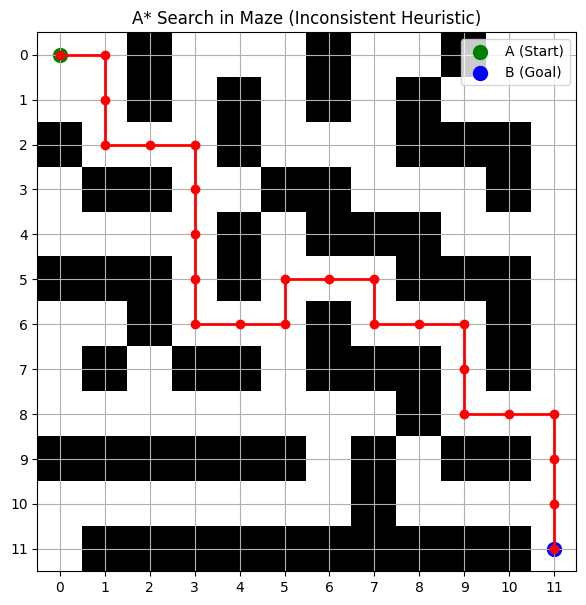

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]


In [43]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

class AStarMaze:
    def __init__(self, maze):
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])
        self.start = self.find_pos('A')
        self.goal = self.find_pos('B')
    
    def find_pos(self, symbol):
        for r in range(self.rows):
            for c in range(self.cols):
                if self.maze[r][c] == symbol:
                    return (r, c)
        return None
    
    def neighbors(self, node):
        directions = [(-1,0), (1,0), (0,-1), (0,1)]
        result = []
        for dr, dc in directions:
            nr, nc = node[0] + dr, node[1] + dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols and self.maze[nr][nc] != 1:
                result.append((nr, nc))
        return result
    
    def manhattan(self, node, weight=1.0, inconsistent_edge=None):
        h = weight * (abs(node[0] - self.goal[0]) + abs(node[1] - self.goal[1]))
        if inconsistent_edge and node == inconsistent_edge[0]:
            h += 2
        return h
    
    def a_star(self, heuristic_weight=1.0, inconsistent_edge=None):
        open_set = []
        heapq.heappush(open_set, (0, 0, self.start))
        came_from = {}
        g_score = {self.start: 0}
        
        while open_set:
            _, current_g, current = heapq.heappop(open_set)
            
            if current == self.goal:
                return self.reconstruct_path(came_from), current_g
            
            for neighbor in self.neighbors(current):
                tentative_g = current_g + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + self.manhattan(neighbor, heuristic_weight, inconsistent_edge)
                    heapq.heappush(open_set, (f_score, tentative_g, neighbor))
                    came_from[neighbor] = current
                    
        return None, float('inf')
    
    def bfs_shortest_path_length(self):
        queue = deque([(self.start, 0)])
        visited = set([self.start])
        
        while queue:
            current, dist = queue.popleft()
            if current == self.goal:
                return dist
            
            for neighbor in self.neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, dist + 1))
        return float('inf')
    
    def reconstruct_path(self, came_from):
        current = self.goal
        path = []
        while current != self.start:
            path.append(current)
            current = came_from[current]
        path.append(self.start)
        path.reverse()
        return path
    
    def visualize(self, path, title="A* Search in Maze (Manhattan Distance)"):
        grid = np.array(self.maze, dtype=object)
        
        # Create numerical grid
        display_grid = np.zeros((self.rows, self.cols))
        for r in range(self.rows):
            for c in range(self.cols):
                display_grid[r][c] = 1 if grid[r][c] == 1 else 0
        
        plt.figure(figsize=(7,7))
        plt.imshow(display_grid, cmap="binary")  # 1=black (wall), 0=white (free)
        plt.xticks(range(display_grid.shape[1]))
        plt.yticks(range(display_grid.shape[0]))
        plt.grid(True)
        
        if path:
            px, py = zip(*path)
            plt.plot(py, px, marker="o", color="red", linewidth=2)
        
        plt.scatter(self.start[1], self.start[0], color="green", s=100, label="A (Start)")
        plt.scatter(self.goal[1], self.goal[0], color="blue", s=100, label="B (Goal)")
        plt.legend()
        plt.title(title)
        plt.show()
        
        print("Path found:", path)


# Maze definition
maze = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]

maze_solver = AStarMaze(maze)

# Optimal path length via BFS
optimal_cost = maze_solver.bfs_shortest_path_length()

# Case 0
print("Case 0 - Manhattan distance")
path0, cost0 = maze_solver.a_star()
print("Path length:", len(path0))
print("Cost:", cost0)
print(f"Optimal cost: {optimal_cost}")
print("Is optimal?", "Yes" if cost0 == optimal_cost else "No")
maze_solver.visualize(path0, title="A* Search in Maze (Manhattan Distance)")

# Case 1
print("\nCase 1 - Manhattan distance * 1.5")
path1, cost1 = maze_solver.a_star(heuristic_weight=1.5)
print("Path length:", len(path1))
print("Cost:", cost1)
print(f"Optimal cost: {optimal_cost}")
print("Is optimal?", "Yes" if cost1 == optimal_cost else "No")
maze_solver.visualize(path1, title="A* Search in Maze (Manhattan x1.5)")

# Case 2
inconsistent_edge = ((2, 3), (2, 4))
print("\nCase 2 - Inconsistent heuristic")
path2, cost2 = maze_solver.a_star(heuristic_weight=1.0, inconsistent_edge=inconsistent_edge)
print("Path length:", len(path2))
print("Cost:", cost2)
print(f"Optimal cost : {optimal_cost}")
print("Is optimal?", "Yes" if cost2 == optimal_cost else "No")
maze_solver.visualize(path2, title="A* Search in Maze (Inconsistent Heuristic)")
